In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #modern visualization

In [2]:
df=pd.read_csv("excess_mortality.csv")
df.head()

,location,date,p_scores_all_ages,p_scores_15_64,p_scores_65_74,p_scores_75_84,p_scores_85plus,deaths_2020_all_ages,average_deaths_2015_2019_all_ages,deaths_2015_all_ages,...,deaths_2017_all_ages,deaths_2018_all_ages,deaths_2019_all_ages,deaths_2010_all_ages,deaths_2011_all_ages,deaths_2012_all_ages,deaths_2013_all_ages,deaths_2014_all_ages,Week,deaths_2021_all_ages
0,Austria,2020-01-05,-10.83,-4.99,-23.21,-5.11,-11.17,1613.0,1809.0,1704.0,...,2293.0,1767.0,1647.0,1557.0,1579.0,1574.0,1637.0,1549.0,1,1944.0
1,Austria,2020-01-12,-8.35,-1.45,-5.43,-5.30,-13.40,1702.0,1857.0,1768.0,...,2340.0,1842.0,1709.0,1582.0,1671.0,1563.0,1659.0,1543.0,2,1941.0
2,Austria,2020-01-19,0.59,-7.32,-1.09,9.77,-2.91,1797.0,1786.4,1837.0,...,2060.0,1786.0,1641.0,1573.0,1513.0,1586.0,1612.0,1578.0,3,NaN
3,Austria,2020-01-26,1.83,14.20,-5.11,10.18,-5.01,1779.0,1747.0,1792.0,...,1938.0,1714.0,1713.0,1573.0,1560.0,1595.0,1584.0,1463.0,4,NaN
4,Austria,2020-02-02,7.06,-5.91,-0.22,19.98,5.79,1947.0,1818.6,1837.0,...,2045.0,1870.0,1732.0,1544.0,1521.0,1545.0,1752.0,1574.0,5,NaN


In [3]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2041 entries, 0 to 2040
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   location                           2041 non-null   object 
 1   date                               2041 non-null   object 
 2   p_scores_all_ages                  1891 non-null   float64
 3   p_scores_15_64                     1867 non-null   float64
 4   p_scores_65_74                     1867 non-null   float64
 5   p_scores_75_84                     1867 non-null   float64
 6   p_scores_85plus                    1867 non-null   float64
 7   deaths_2020_all_ages               1837 non-null   float64
 8   average_deaths_2015_2019_all_ages  1906 non-null   float64
 9   deaths_2015_all_ages               1714 non-null   float64
 10  deaths_2016_all_ages               1872 non-null   float64
 11  deaths_2017_all_ages               1872 non-null   float

In [4]:
df.isnull().sum()

location                                0
date                                    0
p_scores_all_ages                     150
p_scores_15_64                        174
p_scores_65_74                        174
p_scores_75_84                        174
p_scores_85plus                       174
deaths_2020_all_ages                  204
average_deaths_2015_2019_all_ages     135
deaths_2015_all_ages                  327
deaths_2016_all_ages                  169
deaths_2017_all_ages                  169
deaths_2018_all_ages                  169
deaths_2019_all_ages                  169
deaths_2010_all_ages                  532
deaths_2011_all_ages                  481
deaths_2012_all_ages                  481
deaths_2013_all_ages                  429
deaths_2014_all_ages                  429
Week                                    0
deaths_2021_all_ages                 2011
dtype: int64

In [5]:
new_dataframe=df[['location','deaths_2020_all_ages','deaths_2018_all_ages']]

In [6]:
new_dataframe.head()

,location,deaths_2020_all_ages,deaths_2018_all_ages
0,Austria,1613.0,1767.0
1,Austria,1702.0,1842.0
2,Austria,1797.0,1786.0
3,Austria,1779.0,1714.0
4,Austria,1947.0,1870.0


In [7]:
# create a dictionary
# key = old name
# value = new name
dict = {'deaths_2020_all_ages': 'average_deaths_for_2020',
        'deaths_2018_all_ages': 'average_deaths_for_2018'}
 
# call rename () method
new_dataframe.rename(columns=dict,
          inplace=True)
 
# print Data frame after rename columns
new_dataframe

C:\Users\Arsla\miniconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,location,average_deaths_for_2020,average_deaths_for_2018
0,Austria,1613.0,1767.0
1,Austria,1702.0,1842.0
2,Austria,1797.0,1786.0
3,Austria,1779.0,1714.0
4,Austria,1947.0,1870.0
...,...,...,...
2036,United States,NaN,56024.0
2037,United States,NaN,NaN
2038,United States,NaN,NaN
2039,United States,NaN,NaN


In [8]:
new_dataframe.isnull().sum()

location                     0
average_deaths_for_2020    204
average_deaths_for_2018    169
dtype: int64

In [9]:
new_dataframe['average_deaths_for_2020']= new_dataframe['average_deaths_for_2020'].interpolate(method='linear')

C:\Users\Arsla\AppData\Local\Temp/ipykernel_2412/1638957689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataframe['average_deaths_for_2020']= new_dataframe['average_deaths_for_2020'].interpolate(method='linear')


In [10]:
new_dataframe['average_deaths_for_2018']= new_dataframe['average_deaths_for_2018'].interpolate(method='linear')

C:\Users\Arsla\AppData\Local\Temp/ipykernel_2412/1505594040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataframe['average_deaths_for_2018']= new_dataframe['average_deaths_for_2018'].interpolate(method='linear')


In [11]:
new_dataframe.isnull().sum()

location                   0
average_deaths_for_2020    0
average_deaths_for_2018    0
dtype: int64

In [12]:
new_dataframe.head()

,location,average_deaths_for_2020,average_deaths_for_2018
0,Austria,1613.0,1767.0
1,Austria,1702.0,1842.0
2,Austria,1797.0,1786.0
3,Austria,1779.0,1714.0
4,Austria,1947.0,1870.0


In [13]:
new_dataframe.tail()

,location,average_deaths_for_2020,average_deaths_for_2018
2036,United States,73812.0,56024.0
2037,United States,73812.0,56024.0
2038,United States,73812.0,56024.0
2039,United States,73812.0,56024.0
2040,United States,73812.0,56024.0


In [14]:
new_dataframe['death_difference'] = new_dataframe['average_deaths_for_2020'].sub(new_dataframe['average_deaths_for_2018'], axis = 0)

C:\Users\Arsla\AppData\Local\Temp/ipykernel_2412/3017288887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataframe['death_difference'] = new_dataframe['average_deaths_for_2020'].sub(new_dataframe['average_deaths_for_2018'], axis = 0)


In [15]:
new_dataframe

,location,average_deaths_for_2020,average_deaths_for_2018,death_difference
0,Austria,1613.0,1767.0,-154.0
1,Austria,1702.0,1842.0,-140.0
2,Austria,1797.0,1786.0,11.0
3,Austria,1779.0,1714.0,65.0
4,Austria,1947.0,1870.0,77.0
...,...,...,...,...
2036,United States,73812.0,56024.0,17788.0
2037,United States,73812.0,56024.0,17788.0
2038,United States,73812.0,56024.0,17788.0
2039,United States,73812.0,56024.0,17788.0


In [16]:
update_df=df[['location','Week','deaths_2020_all_ages','deaths_2018_all_ages']]

In [17]:
update_df.sort_values(by=['Week'], inplace=True)

C:\Users\Arsla\miniconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [18]:
update_df['Excess_deaths'] = update_df['deaths_2020_all_ages'].sub(update_df['deaths_2018_all_ages'], axis = 0)

C:\Users\Arsla\AppData\Local\Temp/ipykernel_2412/595599803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  update_df['Excess_deaths'] = update_df['deaths_2020_all_ages'].sub(update_df['deaths_2018_all_ages'], axis = 0)


In [19]:
update_df

,location,Week,deaths_2020_all_ages,deaths_2018_all_ages,Excess_deaths
0,Austria,1,1613.0,1767.0,-154.0
950,Italy,1,13328.0,16245.0,-2917.0
1003,Italy,1,NaN,NaN,NaN
1006,Latvia,1,597.0,567.0,30.0
1059,Latvia,1,NaN,NaN,NaN
...,...,...,...,...,...
612,Finland,53,NaN,NaN,NaN
1394,Norway,53,790.0,NaN,NaN
1898,Switzerland,53,NaN,NaN,NaN
500,England & Wales,53,10069.0,NaN,NaN


In [20]:
update_df.describe()

,Week,deaths_2020_all_ages,deaths_2018_all_ages,Excess_deaths
count,2041.000000,1837.000000,1872.000000,1817.000000
mean,25.444390,5158.144801,4731.537393,493.646670
std,15.901442,10680.458704,9398.136794,2101.032674
min,1.000000,28.000000,25.000000,-7134.000000
25%,11.000000,835.000000,821.000000,-37.000000
50%,25.000000,1899.000000,1824.500000,38.000000
75%,39.000000,4212.000000,4315.750000,267.000000
max,53.000000,79012.000000,67491.000000,23789.000000


<Figure size 2160x576 with 0 Axes>

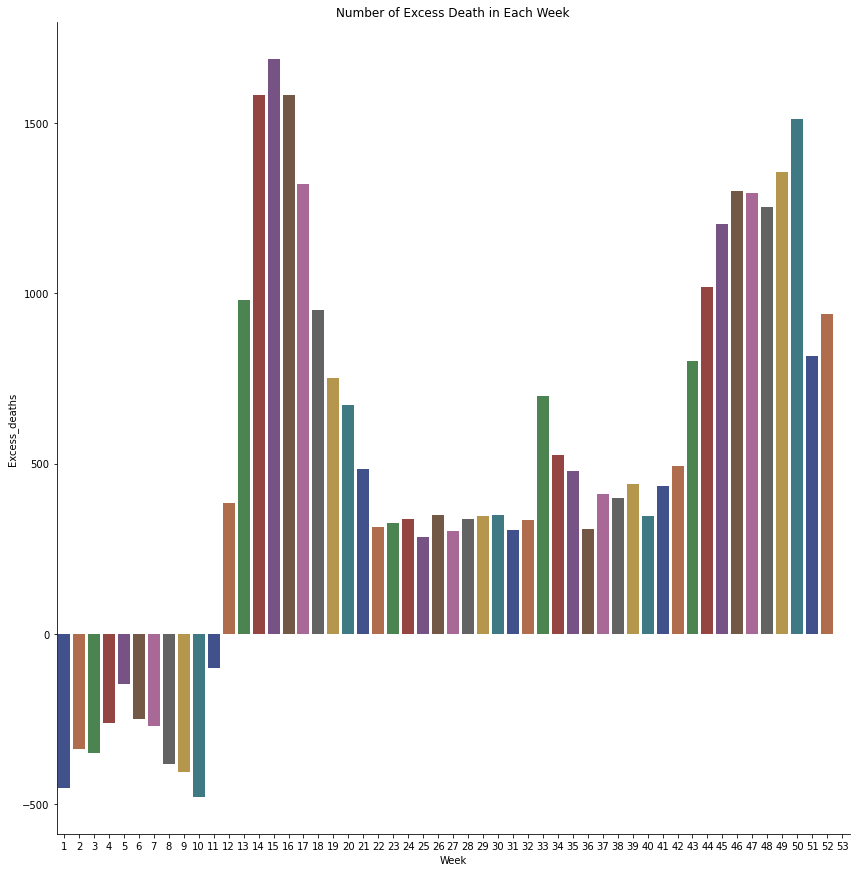

In [21]:
#Number of Excess Death in these Week
plt.figure(figsize=(30,8))
#sns.countplot(x='Week',y='Excess_deaths',data=update_df)
sns.catplot(
    data=update_df, kind="bar",
    x="Week", y="Excess_deaths",
    ci=None, palette="dark", alpha=.8, height=12)
plt.title("Number of Excess Death in Each Week")
plt.show()

## In this Graph we Shows the top 5 week of excess death so the Weeks are 15,16,17,51,52 

<Figure size 2160x576 with 0 Axes>

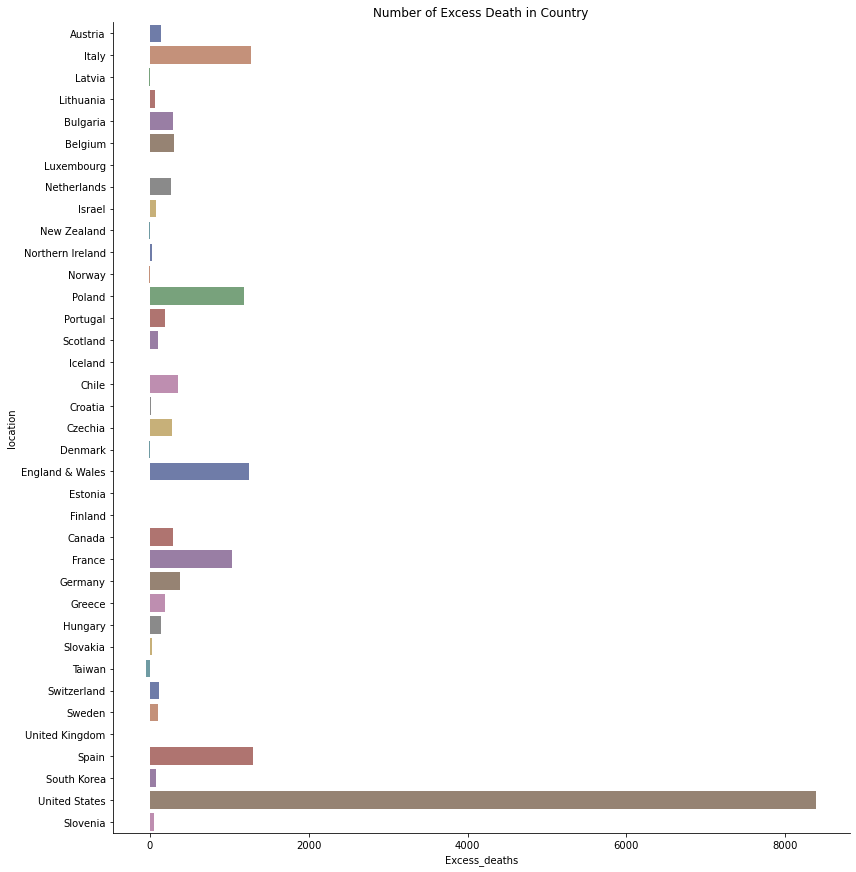

In [22]:
#Number of Excess Death in these Location
plt.figure(figsize=(30,8))
#sns.countplot(x='Week',y='Excess_deaths',data=update_df)
sns.catplot(
    data=update_df, kind="bar",
    x="Excess_deaths", y="location",
    ci=None, palette="dark", alpha=.6, height=12)
plt.title("Number of Excess Death in Country")
plt.show()

In [23]:
df

,location,date,p_scores_all_ages,p_scores_15_64,p_scores_65_74,p_scores_75_84,p_scores_85plus,deaths_2020_all_ages,average_deaths_2015_2019_all_ages,deaths_2015_all_ages,...,deaths_2017_all_ages,deaths_2018_all_ages,deaths_2019_all_ages,deaths_2010_all_ages,deaths_2011_all_ages,deaths_2012_all_ages,deaths_2013_all_ages,deaths_2014_all_ages,Week,deaths_2021_all_ages
0,Austria,2020-01-05,-10.83,-4.99,-23.21,-5.11,-11.17,1613.0,1809.0,1704.0,...,2293.0,1767.0,1647.0,1557.0,1579.0,1574.0,1637.0,1549.0,1,1944.0
1,Austria,2020-01-12,-8.35,-1.45,-5.43,-5.30,-13.40,1702.0,1857.0,1768.0,...,2340.0,1842.0,1709.0,1582.0,1671.0,1563.0,1659.0,1543.0,2,1941.0
2,Austria,2020-01-19,0.59,-7.32,-1.09,9.77,-2.91,1797.0,1786.4,1837.0,...,2060.0,1786.0,1641.0,1573.0,1513.0,1586.0,1612.0,1578.0,3,NaN
3,Austria,2020-01-26,1.83,14.20,-5.11,10.18,-5.01,1779.0,1747.0,1792.0,...,1938.0,1714.0,1713.0,1573.0,1560.0,1595.0,1584.0,1463.0,4,NaN
4,Austria,2020-02-02,7.06,-5.91,-0.22,19.98,5.79,1947.0,1818.6,1837.0,...,2045.0,1870.0,1732.0,1544.0,1521.0,1545.0,1752.0,1574.0,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036,United States,2020-12-27,NaN,NaN,NaN,NaN,NaN,NaN,57129.6,52484.0,...,61084.0,56024.0,58453.0,NaN,NaN,NaN,51940.0,56021.0,52,NaN
2037,United States,2021-01-03,NaN,NaN,NaN,NaN,NaN,NaN,57129.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,NaN
2038,United States,2021-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
2039,United States,2021-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN


In [24]:
df.columns

Index(['location', 'date', 'p_scores_all_ages', 'p_scores_15_64',
       'p_scores_65_74', 'p_scores_75_84', 'p_scores_85plus',
       'deaths_2020_all_ages', 'average_deaths_2015_2019_all_ages',
       'deaths_2015_all_ages', 'deaths_2016_all_ages', 'deaths_2017_all_ages',
       'deaths_2018_all_ages', 'deaths_2019_all_ages', 'deaths_2010_all_ages',
       'deaths_2011_all_ages', 'deaths_2012_all_ages', 'deaths_2013_all_ages',
       'deaths_2014_all_ages', 'Week', 'deaths_2021_all_ages'],
      dtype='object')

In [25]:
new_df=df[['location','date','deaths_2020_all_ages',
       'deaths_2015_all_ages', 'deaths_2016_all_ages', 'deaths_2017_all_ages',
       'deaths_2018_all_ages', 'deaths_2019_all_ages', 'deaths_2010_all_ages',
       'deaths_2011_all_ages', 'deaths_2012_all_ages', 'deaths_2013_all_ages',
       'deaths_2014_all_ages', 'deaths_2021_all_ages',]]

In [26]:
new_df

,location,date,deaths_2020_all_ages,deaths_2015_all_ages,deaths_2016_all_ages,deaths_2017_all_ages,deaths_2018_all_ages,deaths_2019_all_ages,deaths_2010_all_ages,deaths_2011_all_ages,deaths_2012_all_ages,deaths_2013_all_ages,deaths_2014_all_ages,deaths_2021_all_ages
0,Austria,2020-01-05,1613.0,1704.0,1634.0,2293.0,1767.0,1647.0,1557.0,1579.0,1574.0,1637.0,1549.0,1944.0
1,Austria,2020-01-12,1702.0,1768.0,1626.0,2340.0,1842.0,1709.0,1582.0,1671.0,1563.0,1659.0,1543.0,1941.0
2,Austria,2020-01-19,1797.0,1837.0,1608.0,2060.0,1786.0,1641.0,1573.0,1513.0,1586.0,1612.0,1578.0,NaN
3,Austria,2020-01-26,1779.0,1792.0,1578.0,1938.0,1714.0,1713.0,1573.0,1560.0,1595.0,1584.0,1463.0,NaN
4,Austria,2020-02-02,1947.0,1837.0,1609.0,2045.0,1870.0,1732.0,1544.0,1521.0,1545.0,1752.0,1574.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036,United States,2020-12-27,NaN,52484.0,57603.0,61084.0,56024.0,58453.0,NaN,NaN,NaN,51940.0,56021.0,NaN
2037,United States,2021-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2038,United States,2021-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2039,United States,2021-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
new_df['year'] = new_df['date'].str.split("-", n=1, expand = True)[0]

C:\Users\Arsla\AppData\Local\Temp/ipykernel_2412/1563161428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['year'] = new_df['date'].str.split("-", n=1, expand = True)[0]


In [28]:
new_df['year'] = pd.to_numeric(new_df['year'])

C:\Users\Arsla\AppData\Local\Temp/ipykernel_2412/3846135620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['year'] = pd.to_numeric(new_df['year'])


In [29]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2041 entries, 0 to 2040
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              2041 non-null   object 
 1   date                  2041 non-null   object 
 2   deaths_2020_all_ages  1837 non-null   float64
 3   deaths_2015_all_ages  1714 non-null   float64
 4   deaths_2016_all_ages  1872 non-null   float64
 5   deaths_2017_all_ages  1872 non-null   float64
 6   deaths_2018_all_ages  1872 non-null   float64
 7   deaths_2019_all_ages  1872 non-null   float64
 8   deaths_2010_all_ages  1509 non-null   float64
 9   deaths_2011_all_ages  1560 non-null   float64
 10  deaths_2012_all_ages  1560 non-null   float64
 11  deaths_2013_all_ages  1612 non-null   float64
 12  deaths_2014_all_ages  1612 non-null   float64
 13  deaths_2021_all_ages  30 non-null     float64
 14  year                  2041 non-null   int64  
dtypes: float64(12), int64

In [30]:
highest_mortality = ['deaths_2020_all_ages',
       'deaths_2015_all_ages', 'deaths_2016_all_ages', 'deaths_2017_all_ages',
       'deaths_2018_all_ages', 'deaths_2019_all_ages', 'deaths_2010_all_ages',
       'deaths_2011_all_ages', 'deaths_2012_all_ages', 'deaths_2013_all_ages',
       'deaths_2014_all_ages', 'deaths_2021_all_ages']
new_df['highest_mortality']=new_df[highest_mortality].max(axis=1)
new_df

C:\Users\Arsla\AppData\Local\Temp/ipykernel_2412/295505509.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['highest_mortality']=new_df[highest_mortality].max(axis=1)


,location,date,deaths_2020_all_ages,deaths_2015_all_ages,deaths_2016_all_ages,deaths_2017_all_ages,deaths_2018_all_ages,deaths_2019_all_ages,deaths_2010_all_ages,deaths_2011_all_ages,deaths_2012_all_ages,deaths_2013_all_ages,deaths_2014_all_ages,deaths_2021_all_ages,year,highest_mortality
0,Austria,2020-01-05,1613.0,1704.0,1634.0,2293.0,1767.0,1647.0,1557.0,1579.0,1574.0,1637.0,1549.0,1944.0,2020,2293.0
1,Austria,2020-01-12,1702.0,1768.0,1626.0,2340.0,1842.0,1709.0,1582.0,1671.0,1563.0,1659.0,1543.0,1941.0,2020,2340.0
2,Austria,2020-01-19,1797.0,1837.0,1608.0,2060.0,1786.0,1641.0,1573.0,1513.0,1586.0,1612.0,1578.0,NaN,2020,2060.0
3,Austria,2020-01-26,1779.0,1792.0,1578.0,1938.0,1714.0,1713.0,1573.0,1560.0,1595.0,1584.0,1463.0,NaN,2020,1938.0
4,Austria,2020-02-02,1947.0,1837.0,1609.0,2045.0,1870.0,1732.0,1544.0,1521.0,1545.0,1752.0,1574.0,NaN,2020,2045.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036,United States,2020-12-27,NaN,52484.0,57603.0,61084.0,56024.0,58453.0,NaN,NaN,NaN,51940.0,56021.0,NaN,2020,61084.0
2037,United States,2021-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,NaN
2038,United States,2021-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,NaN
2039,United States,2021-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,NaN


In [31]:
new_df.groupby('location')['highest_mortality'].sum().sort_values(ascending=False).head(10)

location
United States      3285634.0
Germany            1029352.0
Italy               742758.0
France              691296.0
England & Wales     644658.0
Spain               525105.0
Poland              504842.0
South Korea         308802.0
Canada              300310.0
Taiwan              182147.0
Name: highest_mortality, dtype: float64

In [32]:
new_df.groupby('location')['highest_mortality'].sum().sort_values(ascending=True).head(10)

location
United Kingdom          0.0
Iceland              2781.0
Luxembourg           5097.0
Estonia             17784.0
Northern Ireland    18547.0
Slovenia            24926.0
Latvia              33356.0
New Zealand         36161.0
Norway              44953.0
Lithuania           48841.0
Name: highest_mortality, dtype: float64

In [33]:
new_df.groupby('year')['highest_mortality'].sum().sort_values(axis=0,ascending=False)

year
2020    10150465.0
2021       71017.0
Name: highest_mortality, dtype: float64

In [34]:
new_df.groupby('year')['highest_mortality'].sum().sort_values(axis=0,ascending=True)

year
2021       71017.0
2020    10150465.0
Name: highest_mortality, dtype: float64

In [35]:
new_df.groupby('year')['highest_mortality'].median().sort_values(axis=0,ascending=True)

year
2020    2039.5
2021    2103.5
Name: highest_mortality, dtype: float64